# Distilabel Dataset Generation (B)

### Installation

Using a Python 3.11.11 Kernel

In [1]:
!uv venv --seed --system-site-packages
!uv init --bare --name ml-distilabel

Using CPython 3.11.11 interpreter at: /usr/local/bin/python3
Creating virtual environment with seed packages at: .venv
         If the cache and target directories are on different filesystems, hardlinking may not be supported.
         If this is intentional, set `export UV_LINK_MODE=copy` or use `--link-mode=copy` to suppress this warning.
 + pip==25.0.1
 + setuptools==78.1.0
 + wheel==0.45.1
Activate with: source .venv/bin/activate
error: Project is already initialized in `/workspaces/ml-distilabel` (`pyproject.toml` file exists)


In [2]:
%%capture
!uv add ipywidgets ipykernel python-dotenv

Change the kernel to use an existing `.venv` to pick up the one you've created with `uv` above.

In [14]:
import importlib.metadata

print("ipywidgets: " + importlib.metadata.version("ipywidgets"))
print("python-dotenv: " + importlib.metadata.version("python-dotenv"))

ipywidgets: 8.1.5
python-dotenv: 1.1.0


In [2]:
%%capture
!uv add distilabel[ollama] beautifulsoup4 pandas Pillow

In [15]:
import importlib.metadata

print("distilabel: " + importlib.metadata.version("distilabel"))
print("beautifulsoup4: " + importlib.metadata.version("beautifulsoup4"))
print("pandas: " + importlib.metadata.version("pandas"))
print("Pillow: " + importlib.metadata.version("Pillow"))

distilabel: 1.5.3
beautifulsoup4: 4.13.3
pandas: 2.2.3
Pillow: 11.1.0


In [12]:
from dotenv import load_dotenv
import os

load_dotenv()

True

### Data Prep
<a name="Data"></a>

In [16]:
from distilabel.pipeline import Pipeline
from distilabel.llms import OllamaLLM
from distilabel.steps import LoadDataFromDicts
from distilabel.steps.tasks import TextGeneration

In [17]:

# Configuration
OLLAMA_HOST_URL = "host.docker.internal" # Lets you access Ollama on the host from inside a devcontainer
OLLAMA_MODEL = "llama3.2:3b-instruct-fp16"  # Change to your desired model (e.g., "mistral")

print(f"Attempting to connect to Ollama at: {OLLAMA_HOST_URL} using model: {OLLAMA_MODEL}")
try:
    ollama_llm = OllamaLLM(
        model=OLLAMA_MODEL,
        host=OLLAMA_HOST_URL,
    )
    print("OllamaLLM object created successfully.")
except Exception as e:
    print(f"Error creating OllamaLLM object: {e}")
    exit(1)


Attempting to connect to Ollama at: host.docker.internal using model: llama3.2:3b-instruct-fp16
OllamaLLM object created successfully.


/tmp/ipykernel_1414/730118271.py:7: UserWarning: A custom validator is returning a value other than `self`.
Returning anything other than `self` from a top level model validator isn't supported when validating via `__init__`.
See the `model_validator` docs (https://docs.pydantic.dev/latest/concepts/validators/#model-validators) for more details.
  ollama_llm = OllamaLLM(


In [39]:
prompts = [
    {"instruction": "Generate a question which includes a git change to an SQL file which asks if there are performance issues introduced, respond with the generated question and sql context only"},
    {"instruction": "Generate a question which includes a git change to an SQL file which asks if there are security issues introduced, respond with the generated question and sql context only"},
    {"instruction": "Generate a question which includes a git change to an SQL file which asks if there are bugs introduced, respond with the generated question and sql context only"},
    {"instruction": "Generate a question which includes a git change to an SQL file which asks if there are improvements which can be suggested, respond with the generated question and sql context only"},
    {"instruction": "Generate a question which includes a git change to an SQL file which asks if the change has adequate docuemntation, respond with the generated question and sql context only"},
]

In [61]:
with Pipeline(name="ollama-docker-demo", description="Demo using host Ollama from Docker") as base_pipeline:
    # Load the data into the pipeline
    data = LoadDataFromDicts(data=prompts)
    # data = LoadDataFromDicts(data=[{"instruction": "Generate a short question about Uplimit."}])

    gen_a = TextGeneration(llm=ollama_llm, output_mappings={"generation": "instruction"})
    gen_b = TextGeneration(llm=ollama_llm, output_mappings={"generation": "response"})

    data >> gen_a >> gen_b

Please ensure the model as defined in `OLLAMA_MODEL` has been pulled to your Ollama server prior to running the next step or it will fail.

In [62]:
print("\nStarting pipeline run...")
try:
    base_distiset = base_pipeline.run(use_cache=False) # Parameters like `use_cache=False` can be added
    print("\nPipeline run completed successfully!")
    print("\nGenerated Data:")
    print(base_distiset)

except Exception as e:
    print(f"\nPipeline run failed: {e}")
    print("\nTroubleshooting Tips:")
    print(f" - Is Ollama running on the host? Try: curl {OLLAMA_HOST_URL.replace('host.docker.internal', 'localhost')}")
    print(f" - Is the model '{OLLAMA_MODEL}' pulled? Try: ollama pull {OLLAMA_MODEL}")
    print(" - Is there a firewall blocking port 11434 on the host?")
    print(" - Does your Docker version support 'host.docker.internal' correctly? (Most modern versions do)")
    print(" - If on Linux, did you run the container with '--add-host=host.docker.internal:host-gateway'?")


Starting pipeline run...


/workspaces/ml-distilabel/.venv/lib/python3.11/site-packages/distilabel/utils/serialization.py:121: UserWarning: A custom validator is returning a value other than `self`.
Returning anything other than `self` from a top level model validator isn't supported when validating via `__init__`.
See the `model_validator` docs (https://docs.pydantic.dev/latest/concepts/validators/#model-validators) for more details.
  instance = cls(**class_)


[04/03/25 13:37:14] INFO     ['distilabel.pipeline'] 📝 Pipeline data will be written to               ]8;id=413497;file:///workspaces/ml-distilabel/.venv/lib/python3.11/site-packages/distilabel/pipeline/base.py\base.py]8;;\:]8;id=532279;file:///workspaces/ml-distilabel/.venv/lib/python3.11/site-packages/distilabel/pipeline/base.py#1015\1015]8;;\
                             '/home/vscode/.cache/distilabel/pipelines/ollama-docker-demo/c01ebfb0c402             
                             b5259a883a99a288ac77e435bd20/executions/d456e73502e5e6a6b914fba8b3379a2ac             
                             89adb27/data/steps_outputs'                                                           

                    INFO     ['distilabel.pipeline'] ⌛ The steps of the pipeline will be loaded in    ]8;id=790929;file:///workspaces/ml-distilabel/.venv/lib/python3.11/site-packages/distilabel/pipeline/base.py\base.py]8;;\:]8;id=112461;file:///workspaces/ml-distilabel/.venv/lib/python3.11/site-packages/distilabel/pipeline/base.py#1046\1046]8;;\
                             stages:                                                                               
                              * Legend: 🚰 GeneratorStep 🌐 GlobalStep 🔄 Step                                     
                              * Stage 0:                                                                           
                                - 🚰 'load_data_from_dicts_0'                                                      
                                - 🔄 'text_generation_0'                                                           
                                - 🔄 'text_generation_1'                                                           

                    INFO     ['distilabel.pipeline'] ⏳ Waiting for all the steps of stage 0 to        ]8;id=946360;file:///workspaces/ml-distilabel/.venv/lib/python3.11/site-packages/distilabel/pipeline/base.py\base.py]8;;\:]8;id=363273;file:///workspaces/ml-distilabel/.venv/lib/python3.11/site-packages/distilabel/pipeline/base.py#1382\1382]8;;\
                             load...                                                                               

[04/03/25 13:37:17] INFO     ['distilabel.pipeline'] ⏳ Steps from stage 0 loaded: 3/3                 ]8;id=871262;file:///workspaces/ml-distilabel/.venv/lib/python3.11/site-packages/distilabel/pipeline/base.py\base.py]8;;\:]8;id=130760;file:///workspaces/ml-distilabel/.venv/lib/python3.11/site-packages/distilabel/pipeline/base.py#1418\1418]8;;\
                              * 'load_data_from_dicts_0' replicas: 1/1                                             
                              * 'text_generation_0' replicas: 1/1                                                  
                              * 'text_generation_1' replicas: 1/1                                                  

                    INFO     ['distilabel.pipeline'] ✅ All the steps from stage 0 have been loaded!   ]8;id=330398;file:///workspaces/ml-distilabel/.venv/lib/python3.11/site-packages/distilabel/pipeline/base.py\base.py]8;;\:]8;id=942582;file:///workspaces/ml-distilabel/.venv/lib/python3.11/site-packages/distilabel/pipeline/base.py#1422\1422]8;;\

                    INFO     ['distilabel.step.load_data_from_dicts_0'] 🚰 Starting yielding    ]8;id=951418;file:///workspaces/ml-distilabel/.venv/lib/python3.11/site-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=600148;file:///workspaces/ml-distilabel/.venv/lib/python3.11/site-packages/distilabel/pipeline/step_wrapper.py#179\179]8;;\
                             batches from generator step 'load_data_from_dicts_0'. Offset: 0                       

                    INFO     ['distilabel.step.load_data_from_dicts_0'] 📨 Step                 ]8;id=607648;file:///workspaces/ml-distilabel/.venv/lib/python3.11/site-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=929502;file:///workspaces/ml-distilabel/.venv/lib/python3.11/site-packages/distilabel/pipeline/step_wrapper.py#290\290]8;;\
                             'load_data_from_dicts_0' sending batch 0 to output queue                              

                    INFO     ['distilabel.step.load_data_from_dicts_0'] 🏁 Finished running     ]8;id=675680;file:///workspaces/ml-distilabel/.venv/lib/python3.11/site-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=762940;file:///workspaces/ml-distilabel/.venv/lib/python3.11/site-packages/distilabel/pipeline/step_wrapper.py#129\129]8;;\
                             step 'load_data_from_dicts_0' (replica ID: 0)                                         

                    INFO     ['distilabel.step.text_generation_0'] 📦 Processing batch 0 in     ]8;id=220677;file:///workspaces/ml-distilabel/.venv/lib/python3.11/site-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=827313;file:///workspaces/ml-distilabel/.venv/lib/python3.11/site-packages/distilabel/pipeline/step_wrapper.py#230\230]8;;\
                             'text_generation_0' (replica ID: 0)                                                   

[04/03/25 13:37:21] INFO     ['distilabel.step.text_generation_0'] 📨 Step 'text_generation_0'  ]8;id=56436;file:///workspaces/ml-distilabel/.venv/lib/python3.11/site-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=234711;file:///workspaces/ml-distilabel/.venv/lib/python3.11/site-packages/distilabel/pipeline/step_wrapper.py#290\290]8;;\
                             sending batch 0 to output queue                                                       

                    INFO     ['distilabel.step.text_generation_0'] 🏁 Finished running step     ]8;id=25708;file:///workspaces/ml-distilabel/.venv/lib/python3.11/site-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=605198;file:///workspaces/ml-distilabel/.venv/lib/python3.11/site-packages/distilabel/pipeline/step_wrapper.py#129\129]8;;\
                             'text_generation_0' (replica ID: 0)                                                   

                    INFO     ['distilabel.step.text_generation_1'] 📦 Processing batch 0 in     ]8;id=380216;file:///workspaces/ml-distilabel/.venv/lib/python3.11/site-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=396338;file:///workspaces/ml-distilabel/.venv/lib/python3.11/site-packages/distilabel/pipeline/step_wrapper.py#230\230]8;;\
                             'text_generation_1' (replica ID: 0)                                                   

[04/03/25 13:37:41] INFO     ['distilabel.step.text_generation_1'] 📨 Step 'text_generation_1'  ]8;id=221250;file:///workspaces/ml-distilabel/.venv/lib/python3.11/site-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=567665;file:///workspaces/ml-distilabel/.venv/lib/python3.11/site-packages/distilabel/pipeline/step_wrapper.py#290\290]8;;\
                             sending batch 0 to output queue                                                       

                    INFO     ['distilabel.step.text_generation_1'] 🏁 Finished running step     ]8;id=312120;file:///workspaces/ml-distilabel/.venv/lib/python3.11/site-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=153457;file:///workspaces/ml-distilabel/.venv/lib/python3.11/site-packages/distilabel/pipeline/step_wrapper.py#129\129]8;;\
                             'text_generation_1' (replica ID: 0)                                                   

Generating train split: 0 examples [00:00, ? examples/s]


Pipeline run completed successfully!

Generated Data:
Distiset({
    default: DatasetDict({
        train: Dataset({
            features: ['instruction', 'distilabel_metadata', 'model_name', 'response'],
            num_rows: 5
        })
    })
})


In [63]:
readme_content = """
---
dataset_name: ollama_sql_review_test
tags:
- sql
- natural-language-to-sql
- distilabel
---

# SQL Question Dataset [toy]

This dataset was generated using **Distilabel** and contains natural language questions paired with SQL queries. The model used is `llama3.2:3b-instruct-fp16`.

The generation environment was a test to use Ollama in combination with a VSCode devcontainer environment using `uv` to better control dependencies/reproducibility.

## Description

- **Inputs**: Natural language questions
- **Outputs**: Corresponding SQL queries
- Generated via: `johnmccabe/ollama_sql_review_test` pipeline

## Usage

```python
from datasets import load_dataset

dataset = load_dataset("johnmccabe/ollama_sql_review_test")
License

MIT """

In [64]:
with open("README.md", "w") as f:
    f.write(readme_content)

In [68]:
base_distiset.push_to_hub(
    "johnmccabe/ollama_sql_review_test",
    commit_message="Generate SQL questions",
    private=False,
    token=os.getenv("HF_TOKEN"),
    generate_card=False,
    include_script=False
)

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

In [66]:
from huggingface_hub import HfApi

api = HfApi()
api.upload_file(
    path_or_fileobj="README.md",
    path_in_repo="README.md",
    repo_id="johnmccabe/ollama_sql_review_test",
    repo_type="dataset",
    token=os.getenv("HF_TOKEN"),
    commit_message="Add custom dataset card"
)

CommitInfo(commit_url='https://huggingface.co/datasets/johnmccabe/ollama_sql_review_test/commit/4317f096cf379b86a8f607993cef6cdba022779f', commit_message='Add custom dataset card', commit_description='', oid='4317f096cf379b86a8f607993cef6cdba022779f', pr_url=None, repo_url=RepoUrl('https://huggingface.co/datasets/johnmccabe/ollama_sql_review_test', endpoint='https://huggingface.co', repo_type='dataset', repo_id='johnmccabe/ollama_sql_review_test'), pr_revision=None, pr_num=None)

### EVOL

Couldn't figure out how to go from the Distiset to a Dataset here so just pulled from HF after the push earlier.

In [75]:
from datasets import Dataset, load_dataset

# Get our initial dataset
evol_base_dataset = load_dataset("johnmccabe/ollama_sql_review_test", split="train")

initial_evol_dataset = (
    evol_base_dataset
    .select_columns(["instruction", "response"])
    .rename_column("instruction", "input")
)

README.md:   0%|          | 0.00/1.48k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/36.3k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/5 [00:00<?, ? examples/s]

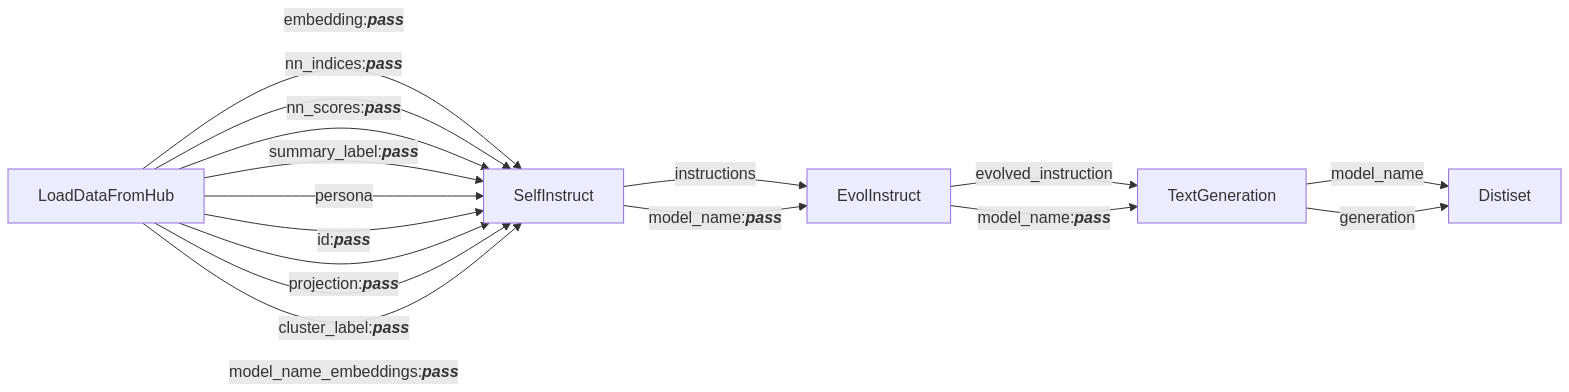

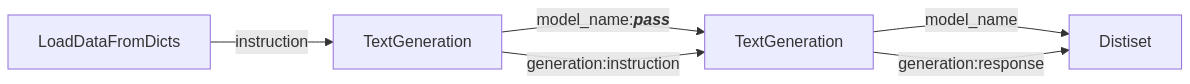

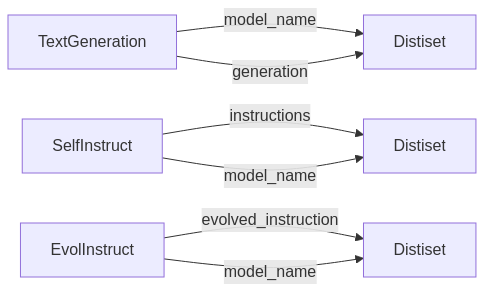

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:13                                                                                   │
│                                                                                                  │
│   10 │   gen_c = TextGeneration(                                                                 │
│   11 │   │   llm=llm, input_mappings={"instruction": "evolved_instruction"}                      │
│   12 │   )                                                                                       │
│ ❱ 13 │   data >> gen_a >> gen_b >> gen_c                                                         │
│   14                                                                                             │
│                                                                                                  │
│ ╭─────────────────────────────────────────── locals ───────────────────────────────────────────╮ │
│ │                  api = <huggingface_hub.hf_api.HfApi object at 0xffff755e3e50>               │ │
│ │        base_distiset = Distiset({                                                            │ │
│ │                        │   default: DatasetDict({                                            │ │
│ │                        │   │   train: Dataset({                                              │ │
│ │                        │   │   │   features: ['instruction', 'distilabel_metadata',          │ │
│ │                        'model_name', 'response'],                                            │ │
│ │                        │   │   │   num_rows: 5                                               │ │
│ │                        │   │   })                                                            │ │
│ │                        │   })                                                                │ │
│ │                        })                                                                    │ │
│ │        base_pipeline = <distilabel.pipeline.local.Pipeline object at 0xffff74cbde90>         │ │
│ │                 data = Dataset({                                                             │ │
│ │                        │   features: ['input', 'response'],                                  │ │
│ │                        │   num_rows: 5                                                       │ │
│ │                        })                                                                    │ │
│ │             distiset = Distiset({                                                            │ │
│ │                        │   default: DatasetDict({                                            │ │
│ │                        │   │   train: Dataset({                                              │ │
│ │                        │   │   │   features: ['id', 'persona', 'model_name_embeddings',      │ │
│ │                        'embedding', 'nn_indices', 'nn_scores', 'projection',                 │ │
│ │                        'cluster_label', 'summary_label', 'instructions',                     │ │
│ │                        'distilabel_metadata', 'model_name', 'evolved_instruction',           │ │
│ │                        'generation'],                                                        │ │
│ │                        │   │   │   num_rows: 1                                               │ │
│ │                        │   │   })                                                            │ │
│ │                        │   })                                                                │ │
│ │                        })                                                                    │ │
│ │    evol_base_dataset = Dataset({                                                             │ │
│ │                        │   features: ['instruction', 'distilabel_metadata', 'model_name',    │ │
│ │                        'response'],                      

In [81]:
from distilabel.steps.tasks import EvolInstruct, SelfInstruct, TextGeneration

with Pipeline() as evol_pipeline:
    data = initial_evol_dataset
    llm = ollama_llm
    gen_a = SelfInstruct(llm=llm, input_mappings={"input": "input"})
    gen_b = EvolInstruct(
        llm=llm, num_evolutions=1, input_mappings={"instruction": "response"}
    )
    gen_c = TextGeneration(
        llm=llm, input_mappings={"instruction": "evolved_instruction"}
    )
    data >> gen_a >> gen_b >> gen_c

In [ ]:
evol_distiset = evol_pipeline.run(use_cache=False)

/workspaces/ml-distilabel/.venv/lib/python3.11/site-packages/distilabel/utils/serialization.py:121: UserWarning: A custom validator is returning a value other than `self`.
Returning anything other than `self` from a top level model validator isn't supported when validating via `__init__`.
See the `model_validator` docs (https://docs.pydantic.dev/latest/concepts/validators/#model-validators) for more details.
  instance = cls(**class_)


[04/03/25 13:28:59] INFO     ['distilabel.pipeline'] 📝 Pipeline data will be written to               ]8;id=835941;file:///workspaces/ml-distilabel/.venv/lib/python3.11/site-packages/distilabel/pipeline/base.py\base.py]8;;\:]8;id=114158;file:///workspaces/ml-distilabel/.venv/lib/python3.11/site-packages/distilabel/pipeline/base.py#1015\1015]8;;\
                             '/home/vscode/.cache/distilabel/pipelines/pipeline_load_data_from_hub_0_s             
                             elf_instruct_0_evol_instruct_0_text_generation_0/eb78fe47185f25f4e52a2f5a             
                             adeda8e7195795dd/executions/facf31b413020ab533c2929bbe4eceae90d92188/data             
                             /steps_outputs'                                                                       

                    INFO     ['distilabel.pipeline'] ⌛ The steps of the pipeline will be loaded in    ]8;id=99969;file:///workspaces/ml-distilabel/.venv/lib/python3.11/site-packages/distilabel/pipeline/base.py\base.py]8;;\:]8;id=975130;file:///workspaces/ml-distilabel/.venv/lib/python3.11/site-packages/distilabel/pipeline/base.py#1046\1046]8;;\
                             stages:                                                                               
                              * Legend: 🚰 GeneratorStep 🌐 GlobalStep 🔄 Step                                     
                              * Stage 0:                                                                           
                                - 🚰 'load_data_from_hub_0'                                                        
                                - 🔄 'self_instruct_0'                                                             
                                - 🔄 'evol_instruct_0'                                                             
                                - 🔄 'text_generation_0'                                                           

                    INFO     ['distilabel.pipeline'] ⏳ Waiting for all the steps of stage 0 to        ]8;id=604205;file:///workspaces/ml-distilabel/.venv/lib/python3.11/site-packages/distilabel/pipeline/base.py\base.py]8;;\:]8;id=359587;file:///workspaces/ml-distilabel/.venv/lib/python3.11/site-packages/distilabel/pipeline/base.py#1382\1382]8;;\
                             load...                                                                               

[04/03/25 13:29:02] INFO     ['distilabel.pipeline'] ⏳ Steps from stage 0 loaded: 3/4                 ]8;id=776641;file:///workspaces/ml-distilabel/.venv/lib/python3.11/site-packages/distilabel/pipeline/base.py\base.py]8;;\:]8;id=681093;file:///workspaces/ml-distilabel/.venv/lib/python3.11/site-packages/distilabel/pipeline/base.py#1418\1418]8;;\
                              * 'load_data_from_hub_0' replicas: 0/1                                               
                              * 'self_instruct_0' replicas: 1/1                                                    
                              * 'evol_instruct_0' replicas: 1/1                                                    
                              * 'text_generation_0' replicas: 1/1                                                  

[04/03/25 13:29:04] INFO     ['distilabel.pipeline'] ⏳ Steps from stage 0 loaded: 4/4                 ]8;id=936449;file:///workspaces/ml-distilabel/.venv/lib/python3.11/site-packages/distilabel/pipeline/base.py\base.py]8;;\:]8;id=15517;file:///workspaces/ml-distilabel/.venv/lib/python3.11/site-packages/distilabel/pipeline/base.py#1418\1418]8;;\
                              * 'load_data_from_hub_0' replicas: 1/1                                               
                              * 'self_instruct_0' replicas: 1/1                                                    
                              * 'evol_instruct_0' replicas: 1/1                                                    
                              * 'text_generation_0' replicas: 1/1                                                  

                    INFO     ['distilabel.pipeline'] ✅ All the steps from stage 0 have been loaded!   ]8;id=166357;file:///workspaces/ml-distilabel/.venv/lib/python3.11/site-packages/distilabel/pipeline/base.py\base.py]8;;\:]8;id=375855;file:///workspaces/ml-distilabel/.venv/lib/python3.11/site-packages/distilabel/pipeline/base.py#1422\1422]8;;\

                    INFO     ['distilabel.step.load_data_from_hub_0'] 🚰 Starting yielding      ]8;id=539651;file:///workspaces/ml-distilabel/.venv/lib/python3.11/site-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=792895;file:///workspaces/ml-distilabel/.venv/lib/python3.11/site-packages/distilabel/pipeline/step_wrapper.py#179\179]8;;\
                             batches from generator step 'load_data_from_hub_0'. Offset: 0                         

                    INFO     ['distilabel.step.load_data_from_hub_0'] 📨 Step                   ]8;id=972947;file:///workspaces/ml-distilabel/.venv/lib/python3.11/site-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=823991;file:///workspaces/ml-distilabel/.venv/lib/python3.11/site-packages/distilabel/pipeline/step_wrapper.py#290\290]8;;\
                             'load_data_from_hub_0' sending batch 0 to output queue                                

                    INFO     ['distilabel.step.load_data_from_hub_0'] 🏁 Finished running step  ]8;id=968769;file:///workspaces/ml-distilabel/.venv/lib/python3.11/site-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=719154;file:///workspaces/ml-distilabel/.venv/lib/python3.11/site-packages/distilabel/pipeline/step_wrapper.py#129\129]8;;\
                             'load_data_from_hub_0' (replica ID: 0)                                                

                    INFO     ['distilabel.step.self_instruct_0'] 📦 Processing batch 0 in       ]8;id=551561;file:///workspaces/ml-distilabel/.venv/lib/python3.11/site-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=791158;file:///workspaces/ml-distilabel/.venv/lib/python3.11/site-packages/distilabel/pipeline/step_wrapper.py#230\230]8;;\
                             'self_instruct_0' (replica ID: 0)                                                     

[04/03/25 13:29:09] INFO     ['distilabel.step.self_instruct_0'] 📨 Step 'self_instruct_0'      ]8;id=364621;file:///workspaces/ml-distilabel/.venv/lib/python3.11/site-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=875564;file:///workspaces/ml-distilabel/.venv/lib/python3.11/site-packages/distilabel/pipeline/step_wrapper.py#290\290]8;;\
                             sending batch 0 to output queue                                                       

                    INFO     ['distilabel.step.self_instruct_0'] 🏁 Finished running step       ]8;id=732464;file:///workspaces/ml-distilabel/.venv/lib/python3.11/site-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=426486;file:///workspaces/ml-distilabel/.venv/lib/python3.11/site-packages/distilabel/pipeline/step_wrapper.py#129\129]8;;\
                             'self_instruct_0' (replica ID: 0)                                                     

                    INFO     ['distilabel.step.evol_instruct_0'] 📦 Processing batch 0 in       ]8;id=627740;file:///workspaces/ml-distilabel/.venv/lib/python3.11/site-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=713587;file:///workspaces/ml-distilabel/.venv/lib/python3.11/site-packages/distilabel/pipeline/step_wrapper.py#230\230]8;;\
                             'evol_instruct_0' (replica ID: 0)                                                     

                    WARNING  ['distilabel.step.evol_instruct_0'] ⚠️ Processing batch 0 with step ]8;id=100055;file:///workspaces/ml-distilabel/.venv/lib/python3.11/site-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=749377;file:///workspaces/ml-distilabel/.venv/lib/python3.11/site-packages/distilabel/pipeline/step_wrapper.py#262\262]8;;\
                             'evol_instruct_0' failed. Sending empty batch filled with                             
                             `None`s...                                                                            

                    WARNING  ['distilabel.step.evol_instruct_0'] Subprocess traceback:          ]8;id=653107;file:///workspaces/ml-distilabel/.venv/lib/python3.11/site-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=438660;file:///workspaces/ml-distilabel/.venv/lib/python3.11/site-packages/distilabel/pipeline/step_wrapper.py#266\266]8;;\
                                                                                                                   
                             Traceback (most recent call last):                                                    
                               File                                                                                
                             "/workspaces/ml-distilabel/.venv/lib/python3.11/site-packages/dist                    
                             ilabel/pipeline/step_wrapper.py", line 241, in                                        
                             _non_generator_process_loop                                                           
                                 result = next(step.process_applying_mappings(*batch.data))                        
                                          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^                        
                               File                                                                                
                             "/workspaces/ml-distilabel/.venv/lib/python3.11/site-packages/dist                    
                             ilabel/steps/base.py", line 671, in process_applying_mappings                         
                                 for output_rows in generator:                                                     
                               File                                                                                
                             "/workspaces/ml-distilabel/.venv/lib/python3.11/site-packages/dist                    
                             ilabel/steps/tasks/evol_instruct/base.py", line 368, in process                       
                                 evolved_instructions, statistics =                                                
                             self._evolve_instructions(inputs)                                                     
                                                                    ^^^^^^^^^^^^^^^^^^^^^^^^^^^                    
                             ^^^^^^                                                                                
                               File                                                                                
                             "/workspaces/ml-distilabel/.venv/lib/python3.11/site-packages/dist                    
                             ilabel/steps/tasks/evol_instruct/base.py", line 276, in                               
                             _evolve_instructions                                                                  
                                 formatted_prompts.append(self._apply_random_mutation(instructi                    
                             on[-1]))                                                                              
                                                          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^                    
                             ^^^^^^^                                                                               
                               File                                                                                
                             "/workspaces/ml-distilabel/.venv/lib/python3.11/site-packages/dist                    
                             ilabel/steps/tasks/evol_instruct/base.py", line 257, in                               
                             _apply_random_mutation                                                                
                                

                    INFO     ['distilabel.step.evol_instruct_0'] 📨 Step 'evol_instruct_0'      ]8;id=938978;file:///workspaces/ml-distilabel/.venv/lib/python3.11/site-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=807443;file:///workspaces/ml-distilabel/.venv/lib/python3.11/site-packages/distilabel/pipeline/step_wrapper.py#290\290]8;;\
                             sending batch 0 to output queue                                                       

                    INFO     ['distilabel.step.evol_instruct_0'] 🏁 Finished running step       ]8;id=46102;file:///workspaces/ml-distilabel/.venv/lib/python3.11/site-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=830118;file:///workspaces/ml-distilabel/.venv/lib/python3.11/site-packages/distilabel/pipeline/step_wrapper.py#129\129]8;;\
                             'evol_instruct_0' (replica ID: 0)                                                     

                    INFO     ['distilabel.step.text_generation_0'] 📦 Processing batch 0 in     ]8;id=771812;file:///workspaces/ml-distilabel/.venv/lib/python3.11/site-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=370762;file:///workspaces/ml-distilabel/.venv/lib/python3.11/site-packages/distilabel/pipeline/step_wrapper.py#230\230]8;;\
                             'text_generation_0' (replica ID: 0)                                                   

                    WARNING  ['distilabel.step.text_generation_0'] ⚠️ Processing batch 0 with    ]8;id=766817;file:///workspaces/ml-distilabel/.venv/lib/python3.11/site-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=763725;file:///workspaces/ml-distilabel/.venv/lib/python3.11/site-packages/distilabel/pipeline/step_wrapper.py#262\262]8;;\
                             step 'text_generation_0' failed. Sending empty batch filled with                      
                             `None`s...                                                                            

                    WARNING  ['distilabel.step.text_generation_0'] Subprocess traceback:        ]8;id=494993;file:///workspaces/ml-distilabel/.venv/lib/python3.11/site-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=20705;file:///workspaces/ml-distilabel/.venv/lib/python3.11/site-packages/distilabel/pipeline/step_wrapper.py#266\266]8;;\
                                                                                                                   
                             Traceback (most recent call last):                                                    
                               File                                                                                
                             "/workspaces/ml-distilabel/.venv/lib/python3.11/site-packages/dist                    
                             ilabel/pipeline/step_wrapper.py", line 241, in                                        
                             _non_generator_process_loop                                                           
                                 result = next(step.process_applying_mappings(*batch.data))                        
                                          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^                        
                               File                                                                                
                             "/workspaces/ml-distilabel/.venv/lib/python3.11/site-packages/dist                    
                             ilabel/steps/base.py", line 671, in process_applying_mappings                         
                                 for output_rows in generator:                                                     
                               File                                                                                
                             "/workspaces/ml-distilabel/.venv/lib/python3.11/site-packages/dist                    
                             ilabel/steps/tasks/base.py", line 447, in process                                     
                                 formatted_inputs = self._format_inputs(inputs)                                    
                                                    ^^^^^^^^^^^^^^^^^^^^^^^^^^^                                    
                               File                                                                                
                             "/workspaces/ml-distilabel/.venv/lib/python3.11/site-packages/dist                    
                             ilabel/steps/tasks/base.py", line 435, in _format_inputs                              
                                 return [self.format_input(input) for input in inputs]                             
                                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^                             
                               File                                                                                
                             "/workspaces/ml-distilabel/.venv/lib/python3.11/site-packages/dist                    
                             ilabel/steps/tasks/base.py", line 435, in <listcomp>                                  
                                 return [self.format_input(input) for input in inputs]                             
                                         ^^^^^^^^^^^^^^^^^^^^^^^^                                                  
                               File                                                                                
                             "/workspaces/ml-distilabel/.venv/lib/python3.11/site-packages/dist                    
                             ilabel/steps/tasks/text_generation.py", line 255, in format_input                     
                                 raise DistilabelUserError(                                                        
                             dist

                    INFO     ['distilabel.step.text_generation_0'] 📨 Step 'text_generation_0'  ]8;id=754952;file:///workspaces/ml-distilabel/.venv/lib/python3.11/site-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=647826;file:///workspaces/ml-distilabel/.venv/lib/python3.11/site-packages/distilabel/pipeline/step_wrapper.py#290\290]8;;\
                             sending batch 0 to output queue                                                       

                    INFO     ['distilabel.step.text_generation_0'] 🏁 Finished running step     ]8;id=17117;file:///workspaces/ml-distilabel/.venv/lib/python3.11/site-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=576318;file:///workspaces/ml-distilabel/.venv/lib/python3.11/site-packages/distilabel/pipeline/step_wrapper.py#129\129]8;;\
                             'text_generation_0' (replica ID: 0)                                                   

Generating train split: 0 examples [00:00, ? examples/s]

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

README.md:   0%|          | 0.00/8.37k [00:00<?, ?B/s]

No files have been modified since last commit. Skipping to prevent empty commit.
--- Logging error ---
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/logging/handlers.py", line 1492, in emit
    self.enqueue(self.prepare(record))
  File "/usr/local/lib/python3.11/logging/handlers.py", line 1450, in enqueue
    self.queue.put_nowait(record)
  File "/usr/local/lib/python3.11/multiprocessing/queues.py", line 138, in put_nowait
    return self.put(obj, False)
           ^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/multiprocessing/queues.py", line 88, in put
    raise ValueError(f"Queue {self!r} is closed")
ValueError: Queue <multiprocessing.queues.Queue object at 0xffff6973be10> is closed
Call stack:
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/workspaces/ml-distilabel/.venv/lib/python3.11/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/work

README.md:   0%|          | 0.00/8.37k [00:00<?, ?B/s]

No files have been modified since last commit. Skipping to prevent empty commit.
--- Logging error ---
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/logging/handlers.py", line 1492, in emit
    self.enqueue(self.prepare(record))
  File "/usr/local/lib/python3.11/logging/handlers.py", line 1450, in enqueue
    self.queue.put_nowait(record)
  File "/usr/local/lib/python3.11/multiprocessing/queues.py", line 138, in put_nowait
    return self.put(obj, False)
           ^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/multiprocessing/queues.py", line 88, in put
    raise ValueError(f"Queue {self!r} is closed")
ValueError: Queue <multiprocessing.queues.Queue object at 0xffff6973be10> is closed
Call stack:
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/workspaces/ml-distilabel/.venv/lib/python3.11/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/work

In [ ]:
distiset.push_to_hub(
    "johnmccabe/ollama_sql_review_test-with-evol",
    include_script=True,
)